plt에서 한글을 쓰기 위해 Nanum 설치

In [ ]:
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False
#런타임 다시 실행

NanumBarunGothic


In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Rea

필요 라이브러리

In [ ]:
import tensorflow as tf
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import konlpy
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

구글 드라이브와 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


이전에 학습시킨 모델을 가져오고 단어 정보도 가져온다.

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/model/best-lstm-model4.h5')
word = pd.read_csv('/content/drive/MyDrive/data/word.csv')
most_words_500_dic ={word['word'][i-2]:i for i in range(2,500)}

comment정보를 다 들고 온다.

In [ ]:
food_comment = pd.read_csv('/content/drive/MyDrive/data/food_comment.csv')
travel_comment = pd.read_csv('/content/drive/MyDrive/data/comment_info.csv')

현재 날짜를 기준으로 최근 3개월 간의 데이터를 수집하기 위해 날짜 범위를 구한다.

In [ ]:
from dateutil.parser import parse
from dateutil.relativedelta import relativedelta
import datetime as dt

now = dt.datetime.now()

startMonth = now.month -3
endMonth = now.month
year = str(now.year)


if startMonth < 10:
  startMonth = '0'+ str(startMonth)


if endMonth < 10:
  endMonth = '0'+ str(endMonth)
  

데이터를 표시하기 위해 미리 plt 설정을 해준다.

In [ ]:
from collections import Counter
plt.gcf().subplots_adjust(bottom=0.15)
plt.tight_layout()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
from matplotlib import *
plt.rc('font', size=5)        # 기본 폰트 크기
plt.rc('axes', labelsize=10)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=5)  # 범례 폰트 크기
plt.rc('figure', titlesize=5) 

<Figure size 432x288 with 0 Axes>

음식점과 관광지에서 3개월간 달린 댓글을 모음

06월에서 09월까지 댓글 개수 : 14620


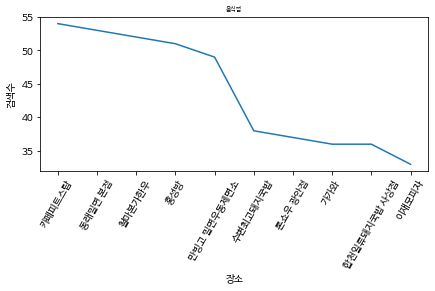

06월에서 09월까지 댓글 개수 : 306


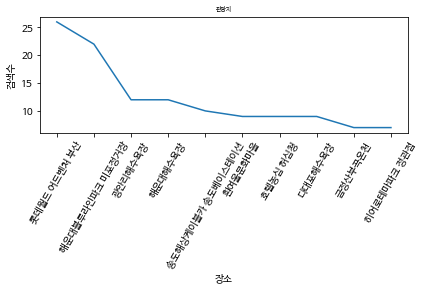

In [ ]:
food_datelist = food_comment['created_at'].to_list()
food_idx = []
food_notNullidx = food_comment[pd.notnull(food_comment['comment'])].index
for i in range(len(food_datelist)):
  date = food_datelist[i].split('.')
  if date[0] == year and  startMonth <= date[1] <= endMonth and i in food_notNullidx:
    food_idx.append(i)
print(startMonth+'월에서 '+endMonth+'월까지 댓글 개수 : {}'.format(len(food_idx)))

plt.xticks(rotation=60)
place_count = Counter(food_comment['place_name'][food_idx])
plotList = place_count.most_common()
x = []
y = []
for i in range(10):
  x.append(plotList[i][0])
  y.append(plotList[i][1])
plt.plot(x,y)
plt.xlabel('장소')
plt.ylabel('검색수')
plt.title('음식점')
plt.show()


travel_datelist = travel_comment['created_at'].to_list()
travel_idx = []
travel_notNullidx = travel_comment[pd.notnull(travel_comment['comment'])].index
for i in range(len(travel_datelist)):
  date = travel_datelist[i].split('.')
  if date[0] == year and  startMonth <= date[1] <= endMonth and i in travel_notNullidx:
    travel_idx.append(i)
print(startMonth+'월에서 '+endMonth+'월까지 댓글 개수 : {}'.format(len(travel_idx)))
plt.xticks(rotation=60)

travel_count = Counter(travel_comment['place_name'][travel_idx])
plotList = travel_count.most_common()
x = []
y = []
for i in range(10):
  x.append(plotList[i][0])
  y.append(plotList[i][1])
plt.plot(x,y)
plt.xlabel('장소')
plt.ylabel('검색수')
plt.title('관광지')
plt.show()

단어 500개를 가지고 입력된 문자열을 토큰화 시켜주는 함수를 만든다.

In [ ]:
from collections import deque
from tensorflow.keras.preprocessing.sequence import pad_sequences

def tokenize(inputList, most_words_500_dic):
  result = [] 
  okt = Okt()
  for i in range(len(inputList)):
    temp = []
    words = okt.nouns(inputList[i])
    for word in words:
      if word in most_words_500_dic:
        temp.append(most_words_500_dic[str(word)])
      else:
        temp.append(1)
    result.append(temp)

  result = pad_sequences(result, maxlen=100)  
  return result

In [ ]:
food_tokenList = tokenize(food_comment['comment'][food_idx].to_list(),most_words_500_dic)
travel_tokenList = tokenize(travel_comment['comment'][travel_idx].to_list(),most_words_500_dic)

In [ ]:
all_travel_tokenList = tokenize(travel_comment['comment'][travel_notNullidx].to_list(), most_words_500_dic)
all_food_tokenList = tokenize(food_comment['comment'][food_notNullidx].to_list(), most_words_500_dic)

In [ ]:
food_result = model.predict(food_tokenList)
travel_result = model.predict(travel_tokenList)
all_travel_result = model.predict(all_travel_tokenList)
all_food_result = model.predict(all_food_tokenList)

In [ ]:
revfood_result = [i[0] for i in food_result]
revtravel_result = [i[0] for i in travel_result]
all_travel_result = [i[0] for i in all_travel_result]
all_food_result = [i[0] for i in all_food_result]


In [ ]:
food_data = {'place' : food_comment['place_name'][food_idx].to_list(),
        'rating' : food_comment['rating'][food_idx].to_list(),
        'comment_sentimentAnalysis' : revfood_result
        }
df = pd.DataFrame(food_data)
df.to_csv("/content/drive/MyDrive/data/food_comment_sentimentAnalysis.csv", index=False)

travel_data = {'place' : travel_comment['place_name'][travel_idx].to_list(),
        'rating' : travel_comment['rating'][travel_idx].to_list(),
        'comment_sentimentAnalysis' : revtravel_result
        }
df = pd.DataFrame(travel_data)
df.to_csv("/content/drive/MyDrive/data/travel_comment_sentimentAnalysis.csv", index=False)

all_travel_data = {'place' : travel_comment['place_name'][travel_notNullidx].to_list(),
        'rating' : travel_comment['rating'][travel_notNullidx].to_list(),
        'comment_sentimentAnalysis' : all_travel_result
        }
df = pd.DataFrame(all_travel_data)
df.to_csv("/content/drive/MyDrive/data/all_travel_comment_sentimentAnalysis.csv", index=False)



all_food_data = {'place' : food_comment['place_name'][food_notNullidx].to_list(),
        'rating' : food_comment['rating'][food_notNullidx].to_list(),
        'comment_sentimentAnalysis' : all_food_result
        }
df = pd.DataFrame(all_food_data)
df.to_csv("/content/drive/MyDrive/data/all_food_comment_sentimentAnalysis.csv", index=False)



In [ ]:
food_sentiAnal = pd.read_csv("/content/drive/MyDrive/data/food_comment_sentimentAnalysis.csv")
food_place = food_sentiAnal['place'].unique()

travel_sentiAnal = pd.read_csv("/content/drive/MyDrive/data/travel_comment_sentimentAnalysis.csv")
travel_place = travel_sentiAnal['place'].unique()

all_travel_sentiAnal = pd.read_csv("/content/drive/MyDrive/data/all_travel_comment_sentimentAnalysis.csv")
all_travel_place = all_travel_sentiAnal['place'].unique()

all_food_sentiAnal = pd.read_csv("/content/drive/MyDrive/data/all_food_comment_sentimentAnalysis.csv")
all_food_place = all_food_sentiAnal['place'].unique()


In [ ]:
food_score_list = []
travel_score_list = []
all_travel_score_list = []
all_food_score_list = []

for i in range(len(food_place)):
  condition = (food_sentiAnal.place == food_place[i])
  score = 0
  for j in range(len(food_sentiAnal[condition])):
    score += food_sentiAnal[condition]['rating'].to_list()[j] * food_sentiAnal[condition]['comment_sentimentAnalysis'].to_list()[j]
  food_score_list.append(score)


for i in range(len(travel_place)):
  condition = (travel_sentiAnal.place == travel_place[i])
  score = 0
  for j in range(len(travel_sentiAnal[condition])):
    score += travel_sentiAnal[condition]['rating'].to_list()[j] * travel_sentiAnal[condition]['comment_sentimentAnalysis'].to_list()[j]
  travel_score_list.append(score)

for i in range(len(all_travel_place)):
  condition = (all_travel_sentiAnal.place == all_travel_place[i])
  score = 0
  for j in range(len(all_travel_sentiAnal[condition])):
    score += all_travel_sentiAnal[condition]['rating'].to_list()[j] * all_travel_sentiAnal[condition]['comment_sentimentAnalysis'].to_list()[j]
  all_travel_score_list.append(score)

for i in range(len(all_food_place)):
  condition = (all_food_sentiAnal.place == all_food_place[i])
  score = 0
  for j in range(len(all_food_sentiAnal[condition])):
    score += all_food_sentiAnal[condition]['rating'].to_list()[j] * all_food_sentiAnal[condition]['comment_sentimentAnalysis'].to_list()[j]
  all_food_score_list.append(score)




bonus = max(food_score_list)
for i in range(len(travel_score_list)):
  travel_score_list[i] += bonus
  
for i in range(len(all_travel_score_list)):
  all_travel_score_list[i] += bonus
  



In [ ]:
food_score_list_pd = {'place' : food_place,
                  'score' : food_score_list}
food_score_list_pd = pd.DataFrame(food_score_list_pd)
food_score_list_pd.to_csv("/content/drive/MyDrive/data/food_score_list.csv", index=False)
food_score_list_pd.to_excel("/content/drive/MyDrive/data/food_score_list.xlsx", index=False)

travel_score_list_pd = {'place' : travel_place,
                  'score' : travel_score_list}
travel_score_list_pd = pd.DataFrame(travel_score_list_pd)
travel_score_list_pd.to_csv("/content/drive/MyDrive/data/travel_score_list.csv", index=False)
travel_score_list_pd.to_excel("/content/drive/MyDrive/data/travel_score_list.xlsx", index=False)


all_travel_score_list_pd = {'place' : all_travel_place,
                  'score' : all_travel_score_list}
all_travel_score_list_pd = pd.DataFrame(all_travel_score_list_pd)
all_travel_score_list_pd.to_csv("/content/drive/MyDrive/data/all_travel_score_list.csv", index=False)
all_travel_score_list_pd.to_excel("/content/drive/MyDrive/data/all_travel_score_list.xlsx", index=False)


all_food_score_list_pd = {'place' : all_food_place,
                  'score' : all_food_score_list}
all_food_score_list_pd = pd.DataFrame(all_food_score_list_pd)
all_food_score_list_pd.to_csv("/content/drive/MyDrive/data/all_food_score_list.csv", index=False)
all_food_score_list_pd.to_excel("/content/drive/MyDrive/data/all_food_score_list.xlsx", index=False)

In [ ]:
food_idx = food_score_list_pd.score.nlargest(10).index

food_recommend_list_pd = {'place' : food_score_list_pd['place'][food_idx],
                  'score' : food_score_list_pd['score'][food_idx]}

food_recommend_list = pd.DataFrame(food_recommend_list_pd)
food_recommend_list.to_excel("/content/drive/MyDrive/data/food_recommend_list.xlsx", index=False)


travel_idx = travel_score_list_pd.score.nlargest(10).index

travel_recommend_list_pd = {'place' : travel_score_list_pd['place'][travel_idx],
                  'score' : travel_score_list_pd['score'][travel_idx]}

travel_recommend_list = pd.DataFrame(travel_recommend_list_pd)
travel_recommend_list.to_excel("/content/drive/MyDrive/data/travel_recommend_list.xlsx", index=False)

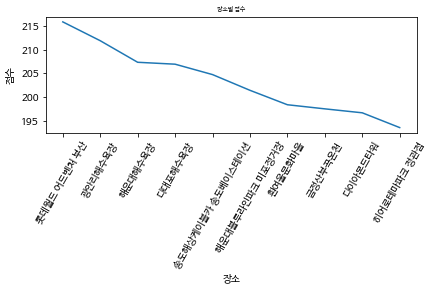

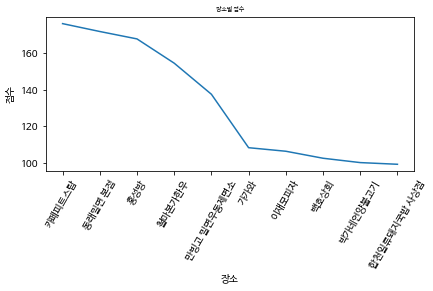

In [ ]:
x = travel_score_list_pd['place'][travel_idx]
y = travel_score_list_pd['score'][travel_idx]
plt.plot(x,y)
plt.xlabel('장소')
plt.ylabel('점수')
plt.title('장소별 점수')
plt.xticks(rotation=60)
plt.show()

x = food_score_list_pd['place'][food_idx]
y = food_score_list_pd['score'][food_idx]
plt.plot(x,y)
plt.xlabel('장소')
plt.ylabel('점수')
plt.title('장소별 점수')
plt.xticks(rotation=60)
plt.show()

In [ ]:

# bonus = max(food_score_list)
# for i in range(len(travel_score_list)):
#   travel_score_list[i] += bonus
  
# for i in range(len(all_travel_score_list)):
#   all_travel_score_list[i] += bonus


food_score_list_pd = {'place' : food_place,
                  'score' : food_score_list}
food_score_list_pd = pd.DataFrame(food_score_list_pd)
food_score_list_pd.to_csv("/content/drive/MyDrive/data/food_score_list.csv", index=False)
food_score_list_pd.to_excel("/content/drive/MyDrive/data/food_score_list.xlsx", index=False)

travel_score_list_pd = {'place' : travel_place,
                  'score' : travel_score_list}
travel_score_list_pd = pd.DataFrame(travel_score_list_pd)
travel_score_list_pd.to_csv("/content/drive/MyDrive/data/travel_score_list.csv", index=False)
travel_score_list_pd.to_excel("/content/drive/MyDrive/data/travel_score_list.xlsx", index=False)


all_travel_score_list_pd = {'place' : all_travel_place,
                  'score' : all_travel_score_list}
all_travel_score_list_pd = pd.DataFrame(all_travel_score_list_pd)
all_travel_score_list_pd.to_csv("/content/drive/MyDrive/data/all_travel_score_list.csv", index=False)
all_travel_score_list_pd.to_excel("/content/drive/MyDrive/data/all_travel_score_list.xlsx", index=False)


all_food_score_list_pd = {'place' : all_food_place,
                  'score' : all_food_score_list}
all_food_score_list_pd = pd.DataFrame(all_food_score_list_pd)
all_food_score_list_pd.to_csv("/content/drive/MyDrive/data/all_food_score_list.csv", index=False)
all_food_score_list_pd.to_excel("/content/drive/MyDrive/data/all_food_score_list.xlsx", index=False)